# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from scipy.stats import linregress

from pprint import pprint

# Import API key. Renamed mine
from api_keys_Yvonne import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
#Retrieve 5 cities
cities[0:5]

['beloha', 'vaini', 'atuona', 'natchez', 'busselton']

In [4]:
# Using: 06-Python-APIs,Day 2, Activities04, Stu_BurundiWeatherAppSolved

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
#using farenheit
units = "imperial"

In [5]:
 # Build query URL and request your results in Farenheit
city = "yellowknife"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
#good habit as 200 means it works 
print(weather_response.status_code)

weather_json = weather_response.json()

200


In [6]:
#see the data
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 62.456, 'lon': -114.3525},
 'dt': 1644116920,
 'id': 6185377,
 'main': {'feels_like': -28.98,
          'humidity': 83,
          'pressure': 1026,
          'temp': -16.38,
          'temp_max': -15.59,
          'temp_min': -17.72},
 'name': 'Yellowknife',
 'sys': {'country': 'CA',
         'id': 2041581,
         'sunrise': 1644076468,
         'sunset': 1644104904,
         'type': 2},
 'timezone': -25200,
 'visibility': 2357,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 8.01}}


In [7]:
#use csv to get the columns we want
city_name = weather_json["name"]
cloudiness = weather_json["clouds"]["all"]
country = weather_json["sys"]["country"]
date_cty = weather_json["dt"]
humidity = weather_json["main"]['humidity']
lat = weather_json["coord"]["lat"]
lng = weather_json["coord"]["lon"]
temp = weather_json["main"]['temp']
wind = weather_json["wind"]["speed"]
pressure = weather_json["main"]['pressure']

In [8]:
#test my outputs for different cities
humidity

83

In [9]:
#make my lists from above 
names = []
cloudys = []
countries = []
dates = []
humids = []
lats = []
lngs = []
temps = []
winds = []
pressures = []

#create loop to go through small count first  
for city in cities:
    
    #request
    print(city)
    
    # Build query URL and request your results in Farenheit
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    #good habit as 200 means it works 
    print(weather_response.status_code)
    #break up data with blank line
    print()
    
    #try catch
    try:
    
        #get data
        weather_json = weather_response.json()

        #use csv to get the columns we want
        city_name = weather_json["name"]
        cloudiness = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        date_cty = weather_json["dt"]
        humidity = weather_json["main"]['humidity']
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        temp = weather_json["main"]['temp']
        wind = weather_json["wind"]["speed"]
        pressure = weather_json["main"]['pressure']

        #now add them into lists
        names.append(city_name)
        cloudys.append(cloudiness)
        countries.append(country)
        dates.append(date_cty)
        humids.append(humidity)
        lats.append(lat)
        lngs.append(lng)
        temps.append(temp)
        winds.append(wind)
        pressures.append(pressure)
        
    except Exception as e:
        #where the error is
        print(e)
        
        # if there is no data for city replace with nan or none
        names.append(city)
        cloudys.append(np.nan)
        countries.append(None)
        dates.append(np.nan)
        humids.append(np.nan)
        lats.append(np.nan)
        lngs.append(np.nan)
        temps.append(np.nan)
        winds.append(np.nan)
        pressures.append(np.nan)
        
    time.sleep(1)

beloha
200

vaini
200

atuona
200

natchez
200

busselton
200

kralendijk
200

punta arenas
200

katsuura
200

ushuaia
200

salalah
200

demirci
200

severo-kurilsk
200

kapaa
200

rongcheng
200

xichang
200

irklievskaya
404

'name'
mahebourg
200

new norfolk
200

ambovombe
200

praia
200

grand gaube
200

mataura
200

nizhniy tsasuchey
200

bluff
200

eyl
200

necochea
200

clyde river
200

saldanha
200

kavieng
200

barrow
200

chernyshevsk
200

hermanus
200

moshupa
200

faya
200

mar del plata
200

leningradskiy
200

hobart
200

nortelandia
200

cape town
200

khatanga
200

manggar
200

tumannyy
404

'name'
puerto armuelles
200

thompson
200

arraial do cabo
200

tugulym
200

camocim
200

upernavik
200

boa vista
200

alvaraes
200

sinnamary
200

armacao dos buzios
404

'name'
carira
200

albany
200

qaanaaq
200

aklavik
200

umm lajj
200

skibbereen
200

bredasdorp
200

bereznik
200

saint george
200

cuamba
200

acapulco
200

vaitupu
404

'name'
rikitea
200

eskasem
404

'name'


200

damietta
200

portsmouth
200

glencoe
200

torbay
200

madimba
200

coronel vivida
200

kathu
200

kirkenaer
200

nyimba
200

novyy urengoy
200

deputatskiy
200

imbituba
200

poros
200

sidi bu zayd
404

'name'
matara
200

gloversville
200

teguldet
200

konevo
200

guru har sahai
200

pokaran
200

jardim
200

auray
200

antalaha
200

angoram
200

tazovskiy
200

ushtobe
200

port-gentil
200

luena
200

romanovka
200

antofagasta
200

wageningen
200

atbasar
200

ruston
200

salta
200

buluang
200

manadhoo
200

guatire
200

dunedin
200

isla mujeres
200

dire dawa
200

nuuk
200

balikpapan
200

mantua
200

koungou
200

kosino
200

saquarema
200

gornopravdinsk
200

gelibolu
200

tawang
200

bumba
200

huarmey
200

sur
200

constitucion
200

dom pedrito
200

naryan-mar
200

kailua
200

biak
200

tura
200

chagda
404

'name'
bayan
200

berbera
200

abu samrah
200

malwan
404

'name'
shingu
200

honningsvag
200

akyab
200

malayal
200

fez
200

senanga
200

balkhash
200

rapid valle

In [10]:
df = pd.DataFrame()

df["City"] = names
df["Cloudiness"] = cloudys
df["Country"] = countries
df["Date"] = dates
df["Humidity %"] = humids
df["Latitude"] = lats
df["Longitude"] = lngs
df["Temperature (F)"] = temps
df["Wind_Speed"] = winds
df["Pressure"] = pressures

df.head()

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
0,Beloha,100.0,MG,1.644117e+09,91.0,-25.1667,45.0500,74.12,21.90,1006.0
1,Vaini,100.0,TO,1.644117e+09,89.0,-21.2000,-175.2000,78.96,14.97,1010.0
2,Atuona,38.0,PF,1.644117e+09,78.0,-9.8000,-139.0333,78.69,20.87,1012.0
3,Natchez,0.0,US,1.644117e+09,86.0,31.5604,-91.4032,30.90,0.00,1029.0
4,Busselton,81.0,AU,1.644117e+09,63.0,-33.6500,115.3333,74.05,14.00,1002.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             632 non-null    object 
 1   Cloudiness       576 non-null    float64
 2   Country          576 non-null    object 
 3   Date             576 non-null    float64
 4   Humidity %       576 non-null    float64
 5   Latitude         576 non-null    float64
 6   Longitude        576 non-null    float64
 7   Temperature (F)  576 non-null    float64
 8   Wind_Speed       576 non-null    float64
 9   Pressure         576 non-null    float64
dtypes: float64(8), object(2)
memory usage: 49.5+ KB


In [12]:
# want to remove null values

In [13]:
df.dropna(inplace=True)
df

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
0,Beloha,100.0,MG,1.644117e+09,91.0,-25.1667,45.0500,74.12,21.90,1006.0
1,Vaini,100.0,TO,1.644117e+09,89.0,-21.2000,-175.2000,78.96,14.97,1010.0
2,Atuona,38.0,PF,1.644117e+09,78.0,-9.8000,-139.0333,78.69,20.87,1012.0
3,Natchez,0.0,US,1.644117e+09,86.0,31.5604,-91.4032,30.90,0.00,1029.0
4,Busselton,81.0,AU,1.644117e+09,63.0,-33.6500,115.3333,74.05,14.00,1002.0
...,...,...,...,...,...,...,...,...,...,...
627,Myre,100.0,NO,1.644118e+09,88.0,69.1036,15.9492,33.75,26.71,970.0
628,Chumphon,93.0,TH,1.644118e+09,58.0,10.3333,98.8333,80.71,7.23,1013.0
629,Broken Hill,17.0,AU,1.644118e+09,26.0,-31.9500,141.4333,82.27,16.75,1016.0
630,Karlshus,0.0,NO,1.644118e+09,74.0,59.3520,10.8723,36.12,8.05,982.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 631
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             576 non-null    object 
 1   Cloudiness       576 non-null    float64
 2   Country          576 non-null    object 
 3   Date             576 non-null    float64
 4   Humidity %       576 non-null    float64
 5   Latitude         576 non-null    float64
 6   Longitude        576 non-null    float64
 7   Temperature (F)  576 non-null    float64
 8   Wind_Speed       576 non-null    float64
 9   Pressure         576 non-null    float64
dtypes: float64(8), object(2)
memory usage: 49.5+ KB


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#Export the my city data into a .csv.
df.to_csv("yvonne_data.csv", index=False)

In [16]:
#Display the DataFrame. should be 601 cities
df

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
0,Beloha,100.0,MG,1.644117e+09,91.0,-25.1667,45.0500,74.12,21.90,1006.0
1,Vaini,100.0,TO,1.644117e+09,89.0,-21.2000,-175.2000,78.96,14.97,1010.0
2,Atuona,38.0,PF,1.644117e+09,78.0,-9.8000,-139.0333,78.69,20.87,1012.0
3,Natchez,0.0,US,1.644117e+09,86.0,31.5604,-91.4032,30.90,0.00,1029.0
4,Busselton,81.0,AU,1.644117e+09,63.0,-33.6500,115.3333,74.05,14.00,1002.0
...,...,...,...,...,...,...,...,...,...,...
627,Myre,100.0,NO,1.644118e+09,88.0,69.1036,15.9492,33.75,26.71,970.0
628,Chumphon,93.0,TH,1.644118e+09,58.0,10.3333,98.8333,80.71,7.23,1013.0
629,Broken Hill,17.0,AU,1.644118e+09,26.0,-31.9500,141.4333,82.27,16.75,1016.0
630,Karlshus,0.0,NO,1.644118e+09,74.0,59.3520,10.8723,36.12,8.05,982.0


In [17]:
df.describe()

,Cloudiness,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
count,576.000000,5.760000e+02,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,58.951389,1.644117e+09,74.711806,18.900379,23.219680,49.431580,8.090069,1014.593750
std,40.622817,2.494609e+02,18.864375,32.804150,87.466279,31.654491,6.417133,10.323038
min,0.000000,1.644117e+09,10.000000,-54.800000,-175.200000,-39.050000,0.000000,970.000000
25%,14.000000,1.644117e+09,65.000000,-7.774925,-55.634475,28.087500,3.172500,1011.000000
50%,75.000000,1.644117e+09,77.000000,20.041650,30.268450,60.715000,6.700000,1013.000000
75%,100.000000,1.644118e+09,89.000000,47.909450,99.592950,75.112500,11.070000,1021.000000
max,100.000000,1.644118e+09,100.000000,78.218600,179.316700,92.700000,40.290000,1053.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#  Get the indices of cities that have humidity over 100%.
#using .describe I can see what the max humidty is in my data set. if its 100% then that means there is not any cities over 100%
data_humidity = df["Humidity %"].describe()
data_humidity


count    576.000000
mean      74.711806
std       18.864375
min       10.000000
25%       65.000000
50%       77.000000
75%       89.000000
max      100.000000
Name: Humidity %, dtype: float64

In [19]:
#  Get the indices of cities that have humidity over 100%.
print(f" There are no cities that have humidity over 100%")

 There are no cities that have humidity over 100%


In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"I can use by current data frame since I did not have to drop humidity outliers")

I can use by current data frame since I did not have to drop humidity outliers


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [21]:
df.columns

Index(['City', 'Cloudiness', 'Country', 'Date', 'Humidity %', 'Latitude',
       'Longitude', 'Temperature (F)', 'Wind_Speed', 'Pressure'],
      dtype='object')

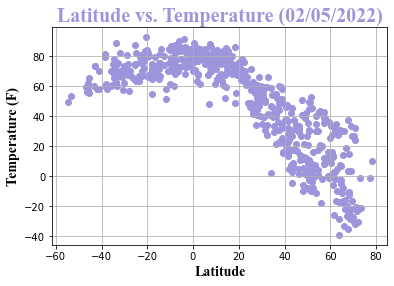

In [22]:
#plot my scatter plot using Latitude vs. Temperature
plt.scatter(df["Latitude"],df["Temperature (F)"],color="#9C95DC",marker="o",linewidths=1)

plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Temperature (F)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Latitude vs. Temperature (02/05/2022)',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#9C95DC")
plt.grid(True)

In [23]:
#Save the plotted figures as .pngs
plt.savefig("FIG 1.Temperature (F) vs. Latitude.png")

<Figure size 432x288 with 0 Axes>

In [24]:
#After each plot, add a sentence or two explaining what the code is analyzing.
print(f" The scatter plot above is comparing latitude versus temperature in all cities. Values shows that as latitude increases the temperature decreases.")

 The scatter plot above is comparing latitude versus temperature in all cities. Values shows that as latitude increases the temperature decreases.


## Latitude vs. Humidity Plot

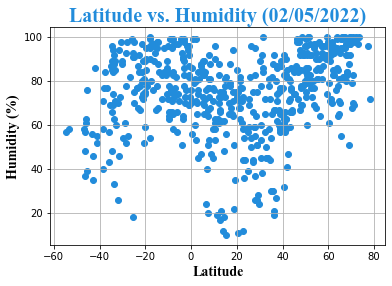

In [25]:
#plot my scatter plot using Latitude vs. Humidity
plt.scatter(df["Latitude"],df["Humidity %"],color="#228CDB",marker="o",linewidths=1)

plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Humidity (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Latitude vs. Humidity (02/05/2022)',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#228CDB")
plt.grid(True)

In [26]:
#Save the plotted figures as .pngs
plt.savefig("FIG 2.Humidity (%) vs. Latitude.png")

<Figure size 432x288 with 0 Axes>

In [27]:
#After each plot, add a sentence or two explaining what the code is analyzing.
print(f" The scatter plot above is comparing latitude versus temperature in all cities. We can see that all cities have some humidity and there does not seem to be a relationship.")

 The scatter plot above is comparing latitude versus temperature in all cities. We can see that all cities have some humidity and there does not seem to be a relationship.


## Latitude vs. Cloudiness Plot

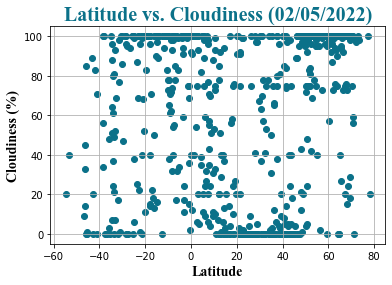

In [28]:
#plot my scatter plot using Latitude vs. Cloudiness
plt.scatter(df["Latitude"],df["Cloudiness"],color="#0B7189",marker="o",linewidths=1)

plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Cloudiness (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Latitude vs. Cloudiness (02/05/2022)',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#0B7189")
plt.grid(True)

In [29]:
#Save the plotted figures as .pngs
plt.savefig("FIG 3.Cloudiness (%) vs. Latitude.png")

<Figure size 432x288 with 0 Axes>

In [30]:
#After each plot, add a sentence or two explaining what the code is analyzing.
print(f" The scatter plot above is comparing latitude versus cloudiness in all cities. There does not seem to be a relationship between the two. ")

 The scatter plot above is comparing latitude versus cloudiness in all cities. There does not seem to be a relationship between the two. 


## Latitude vs. Wind Speed Plot

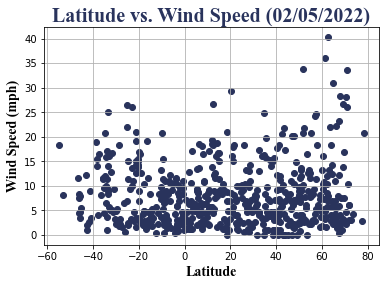

In [31]:
#plot my scatter plot using Latitude vs. Cloudiness
plt.scatter(df["Latitude"],df["Wind_Speed"],color="#29335C",marker="o",linewidths=1)

plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Wind Speed (mph)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Latitude vs. Wind Speed (02/05/2022)',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#29335C")
plt.grid(True)

In [32]:
#Save the plotted figures as .pngs
plt.savefig("FIG 4.Wind Speed (mph) vs. Latitude.png")

<Figure size 432x288 with 0 Axes>

In [33]:
#After each plot, add a sentence or two explaining what the code is analyzing.
print(f" The scatter plot above is comparing latitude versus wind speed in all cities. There does not seem to be a relationship between the two, but most cities are below 25 mph. ")

 The scatter plot above is comparing latitude versus wind speed in all cities. There does not seem to be a relationship between the two, but most cities are below 25 mph. 


## Linear Regression

In [34]:
#separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)

In [35]:
#create northern and southern df for below plots
north_df = df.loc[(df['Latitude'] > 0)]
south_df =df.loc[(df['Latitude'] < 0)]

In [36]:
north_df

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
3,Natchez,0.0,US,1.644117e+09,86.0,31.5604,-91.4032,30.90,0.00,1029.0
5,Kralendijk,20.0,BQ,1.644117e+09,88.0,12.1500,-68.2667,75.18,5.75,1014.0
7,Katsuura,31.0,JP,1.644117e+09,30.0,35.1333,140.3000,41.14,8.37,1013.0
9,Salalah,4.0,OM,1.644117e+09,79.0,17.0151,54.0924,68.25,3.33,1014.0
10,Demirci,81.0,TR,1.644117e+09,58.0,39.0461,28.6589,32.05,3.80,1023.0
...,...,...,...,...,...,...,...,...,...,...
626,Calabozo,51.0,VE,1.644118e+09,47.0,8.9242,-67.4293,82.09,8.03,1011.0
627,Myre,100.0,NO,1.644118e+09,88.0,69.1036,15.9492,33.75,26.71,970.0
628,Chumphon,93.0,TH,1.644118e+09,58.0,10.3333,98.8333,80.71,7.23,1013.0
630,Karlshus,0.0,NO,1.644118e+09,74.0,59.3520,10.8723,36.12,8.05,982.0


In [37]:
south_df

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
0,Beloha,100.0,MG,1.644117e+09,91.0,-25.1667,45.0500,74.12,21.90,1006.0
1,Vaini,100.0,TO,1.644117e+09,89.0,-21.2000,-175.2000,78.96,14.97,1010.0
2,Atuona,38.0,PF,1.644117e+09,78.0,-9.8000,-139.0333,78.69,20.87,1012.0
4,Busselton,81.0,AU,1.644117e+09,63.0,-33.6500,115.3333,74.05,14.00,1002.0
6,Punta Arenas,40.0,CL,1.644117e+09,58.0,-53.1500,-70.9167,53.71,8.05,1013.0
...,...,...,...,...,...,...,...,...,...,...
603,Constitución,0.0,CL,1.644118e+09,69.0,-35.3333,-72.4167,60.85,9.51,1013.0
604,Dom Pedrito,1.0,BR,1.644118e+09,73.0,-30.9828,-54.6731,66.40,9.46,1011.0
607,Biak,69.0,ID,1.644118e+09,69.0,-0.9131,122.8766,83.59,2.46,1010.0
619,Senanga,100.0,ZM,1.644118e+09,96.0,-16.1167,23.2667,65.97,3.06,1010.0


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7776140854523758


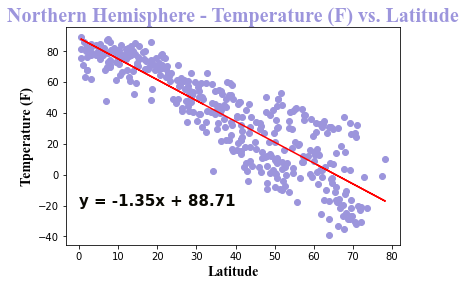

In [38]:
#linear regression model like in class activity day 3 act 9

x_values = north_df['Latitude']
y_values = north_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#9C95DC")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Temperature (F)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#9C95DC")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [39]:
#Save the plotted figures as .pngs
plt.savefig("FIG 5.Northern Hemisphere - Temperature (F) vs. Latitude.png")

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.29942980703434946


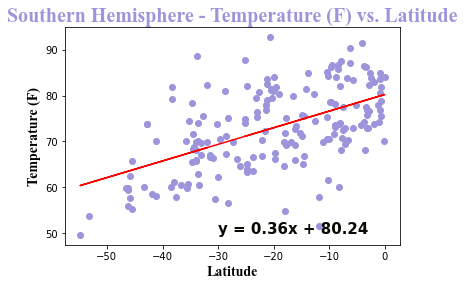

In [40]:
#linear regression model like in class activity day 3 act 9

x_values = south_df['Latitude']
y_values = south_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#9C95DC")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Temperature (F)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#9C95DC")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [41]:
#Save the plotted figures as .pngs
plt.savefig("FIG 6.Southern Hemisphere - Temperature (F) vs. Latitude.png")

<Figure size 432x288 with 0 Axes>

In [42]:
#After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.
print(f" Comparing linear regression from both hemispheres, the northern hemisphere has a negative correlation and the southern has a positive. In other words temperature is higher closer to 0 latitude (equator.) ")

 Comparing linear regression from both hemispheres, the northern hemisphere has a negative correlation and the southern has a positive. In other words temperature is higher closer to 0 latitude (equator.) 


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18884349568073536


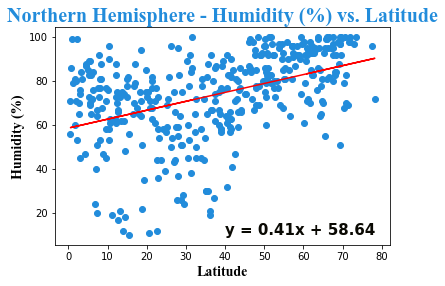

In [43]:
#linear regression model like in class activity day 3 act 9

x_values = north_df['Latitude']
y_values = north_df['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#228CDB")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Humidity (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#228CDB")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [44]:
#Save the plotted figures as .pngs
plt.savefig("FIG 7.Northern Hemisphere - Humidity (%) vs. Latitude.png")

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14514732179873455


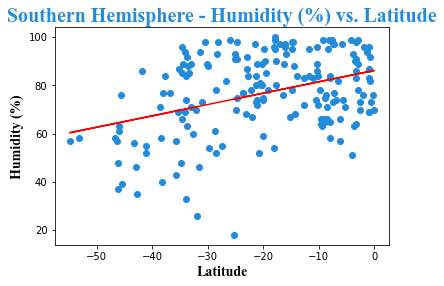

In [45]:
#linear regression model like in class activity day 3 act 9

x_values = south_df['Latitude']
y_values = south_df['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#228CDB")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Humidity (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#228CDB")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [46]:
#Save the plotted figures as .pngs
plt.savefig("FIG 8.Southern Hemisphere - Humidity (%) vs. Latitude.png")

<Figure size 432x288 with 0 Axes>

In [47]:
#After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.
print(f" Comparing linear regression from both hemispheres, both hemisphere do not display a positive correlation for humidity. ")

 Comparing linear regression from both hemispheres, both hemisphere do not display a positive correlation for humidity. 


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1008913726809289


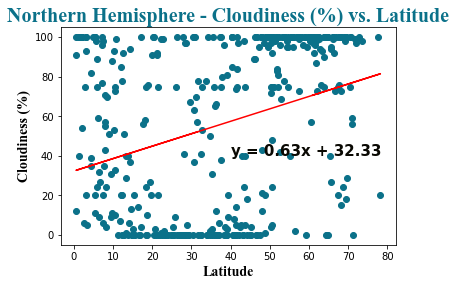

In [48]:
#linear regression model like in class activity day 3 act 9

x_values = north_df['Latitude']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#0B7189")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Cloudiness (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#0B7189")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [49]:
#Save the plotted figures as .pngs
plt.savefig("FIG 9.Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11401970931012627


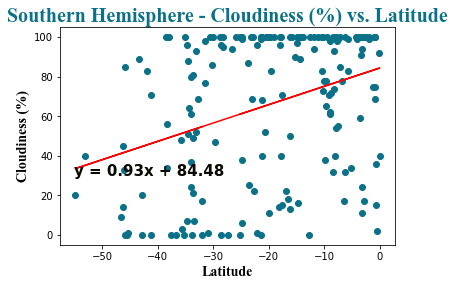

In [50]:
#linear regression model like in class activity day 3 act 9

x_values = south_df['Latitude']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#0B7189")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Cloudiness (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#0B7189")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [51]:
#Save the plotted figures as .pngs
plt.savefig("FIG 10.Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

<Figure size 432x288 with 0 Axes>

In [52]:
#After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.
print(f" Comparing linear regression from both hemispheres, both hemisphere do not display a strong correlation for cloudiness. ")

 Comparing linear regression from both hemispheres, both hemisphere do not display a strong correlation for cloudiness. 


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011976866964245608


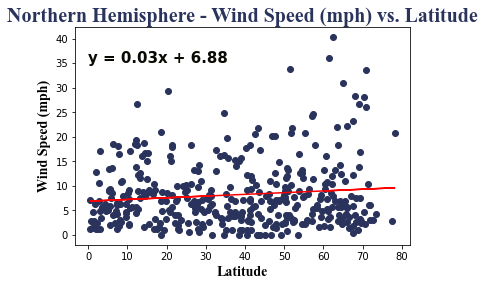

In [53]:
#linear regression model like in class activity day 3 act 9

x_values = north_df['Latitude']
y_values = north_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#29335C")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Wind Speed (mph)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#29335C")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [54]:
#Save the plotted figures as .pngs
plt.savefig("FIG 11.Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.050881004192038275


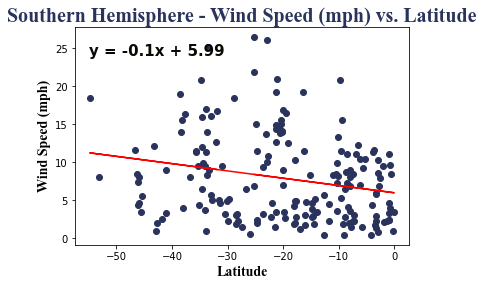

In [55]:
#linear regression model like in class activity day 3 act 9

x_values = south_df['Latitude']
y_values = south_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#29335C")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,24),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Wind Speed (mph)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#29335C")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [56]:
#Save the plotted figures as .pngs
plt.savefig("FIG 12.Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")

<Figure size 432x288 with 0 Axes>

In [57]:
#After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.
print(f" Comparing linear regression from both hemispheres, both hemisphere do not display a strong correlation for wind speed. ")

 Comparing linear regression from both hemispheres, both hemisphere do not display a strong correlation for wind speed. 


In [59]:
#For Part I, you must include a written description of three observable trends based on the data.

print(f"Observation 1: One very obvious observation is the relationship between latitude and tempertures in both hemispheres. Temperature is higher closer to equator.")


print(f"Observation 2: Refering to the scatterplot Latitude vs. Wind Speed Plot, most cities are under 20pmh from random selected cities. We are not able to see a true correlation.")


print(f"Observation 3: Refering to the Latitude vs. Cloudiness Plot, we cannot make conclusions of correlation due to variability from random selected cities.")

Observation 1: One very obvious observation is the relationship between latitude and tempertures in both hemispheres. Temperature is higher closer to equator.
Observation 2: Refering to the scatterplot Latitude vs. Wind Speed Plot, most cities are under 20pmh from random selected cities. We are not able to see a true correlation.
Observation 3: Refering to the Latitude vs. Cloudiness Plot, we cannot make conclusions of correlation due to variability from random selected cities.
